In [1]:
import numpy as np # type: ignore

import pandas as pd # type: ignore

import matplotlib.pyplot as plt # type: ignore

from tensorflow.keras.datasets import mnist # type: ignore



In [3]:
digit=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
type(digit)

tuple

In [5]:
(X_train,y_train), (X_test, y_test)=digit 

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train[0:1]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,
           0,   0,   0

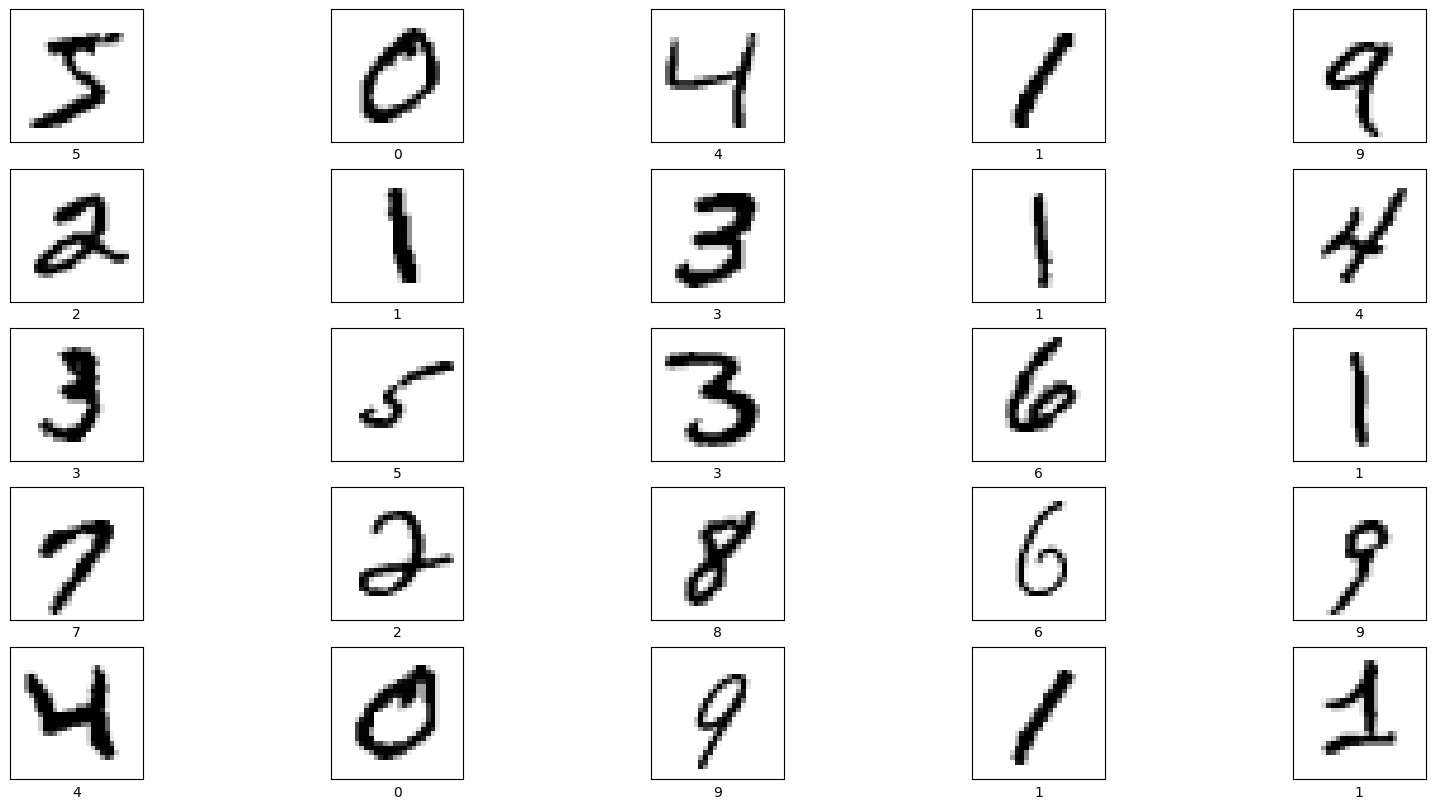

In [8]:
# Function to plot sample images

def plot_sample_images(X, y, num_images=25):

    plt.figure(figsize=(20, 10))

    for i in range(num_images):

        plt.subplot(5, 5, i+1)

        plt.xticks([])

        plt.yticks([])

        plt.grid(False)

        plt.imshow(X[i], cmap=plt.cm.binary)

        plt.xlabel(y[i])

    plt.show()

# Display sample images

plot_sample_images(X_train, y_train)

In [9]:
X_train.shape[0]

60000

In [13]:
# Flatten the images

X_train_flat = X_train.reshape(X_train.shape[0], -1)

X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [14]:
X_train_flat.shape,X_test_flat.shape

((60000, 784), (10000, 784))

In [18]:
# Normalize the features
from sklearn.preprocessing import StandardScaler # type: ignore
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train_flat)

X_test_sc = scaler.transform(X_test_flat)

In [19]:
from sklearn.linear_model import LogisticRegression # type: ignore

from sklearn.tree import DecisionTreeClassifier # type: ignore

from sklearn.ensemble import RandomForestClassifier # type: ignore

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report # type: ignore

In [20]:
# Initialize the models

models = {

    "Log_Reg": LogisticRegression(max_iter=1000),

    "D_Tree": DecisionTreeClassifier(),

    "Rand_Forest": RandomForestClassifier()

}

 

# Train the models

for name, model in models.items():

    print(f"Training {name}...")

    model.fit(X_train_sc, y_train)

 

    # Evaluate the models

for name, model in models.items():

    print(f"Evaluating {name}...")

    y_pred = model.predict(X_test_sc)

    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))

    print(f"{name} Accuracy:", accuracy_score(y_test, y_pred))

    print(f"{name} Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Training Log_Reg...
Training D_Tree...
Training Rand_Forest...
Evaluating Log_Reg...
Log_Reg Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.92      0.89      0.90      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.93      0.93       982
           5       0.89      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.92      1028
           8       0.87      0.88      0.87       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

Log_Reg Accuracy: 0.9214
Log_Reg Confusion Matrix:
 [[ 948    0    3    4    1   12    6    3    3    0]
 [   0 1108    8   

In [21]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 